In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('eval_results_shortened_name.csv', index_col=0)

In [17]:
def parse_run_name(name):
    ckpt, step = name.split('/')
    step = int(step.split('-')[-1])
    return ckpt, step

In [18]:
runs = {}
for idx, row in df.iterrows():
    ckpt, step = parse_run_name(idx)
    if ckpt not in runs:
        runs[ckpt] = {'acc': [], 'auroc': []}
    runs[ckpt]['acc'].append((step, row['eval/acc']))
    runs[ckpt]['auroc'].append((step, row['eval/auroc']))

for ckpt in runs:
    runs[ckpt]['acc'] = sorted(runs[ckpt]['acc'], key=lambda x: x[0])
    runs[ckpt]['auroc'] = sorted(runs[ckpt]['auroc'], key=lambda x: x[0])

In [19]:
last_step_metric = {}
for ckpt in runs:
    last_step_metric[ckpt] = {}
    last_step_metric[ckpt]['acc'] = runs[ckpt]['acc'][-1][1]
    last_step_metric[ckpt]['auroc'] = runs[ckpt]['auroc'][-1][1]

In [20]:
last_step_metric

{'without-sg': {'acc': 0.7911632723507076, 'auroc': 0.7702614553103116},
 'pissa-with-sg-sampling': {'acc': 0.7894373489817053,
  'auroc': 0.7299572914372296},
 'pissa-with-sg': {'acc': 0.8046254746289265, 'auroc': 0.8139260896189996},
 'pissa-with-sg-sampling-default': {'acc': 0.7880566102865033,
  'auroc': 0.7330896359424808},
 'pissa-without-sg-memes': {'acc': 0.7894373489817053,
  'auroc': 0.7301893505732799},
 'pissa-without-sg': {'acc': 0.8066965826717294, 'auroc': 0.8019068181213074},
 'with-sg': {'acc': 0.8028995512599241, 'auroc': 0.7909967106298212},
 'without-sg-memes': {'acc': 0.7918536416983086, 'auroc': 0.7575384425473617},
 'pretrained': {'acc': 0.7000345184673801, 'auroc': 0.6394424287605682},
 'with-sg-loraplus': {'acc': 0.8087676907145323, 'auroc': 0.8042252916018193},
 'with-sg-dora': {'acc': 0.8018639972385226, 'auroc': 0.7922731871552393},
 'with-sg-rslora': {'acc': 0.804280289955126, 'auroc': 0.8191188288002633}}

In [21]:
last_step_df = pd.DataFrame(last_step_metric).T

In [22]:
last_step_df.to_csv('last_step_metric.csv')

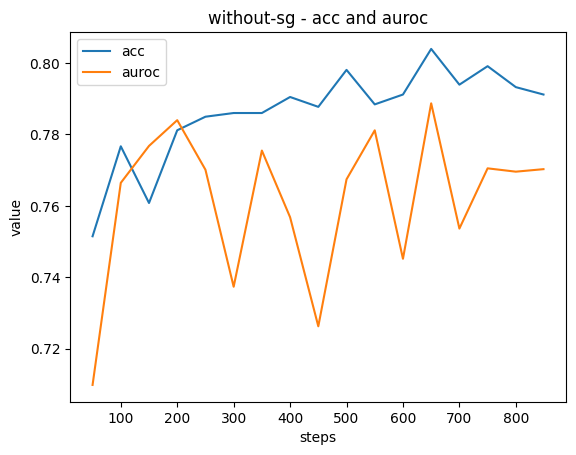

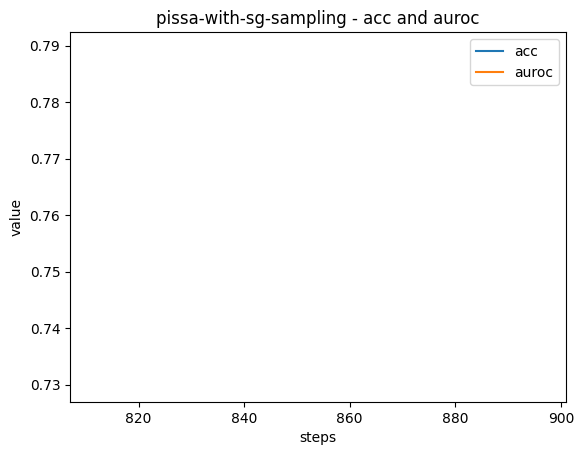

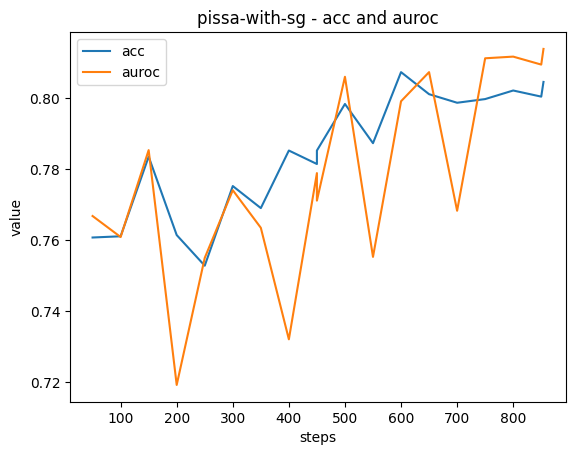

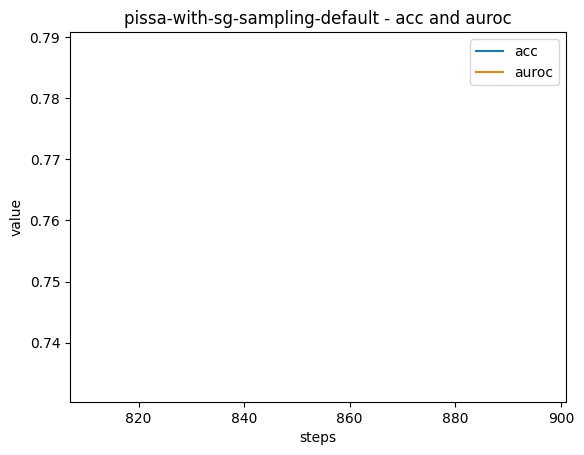

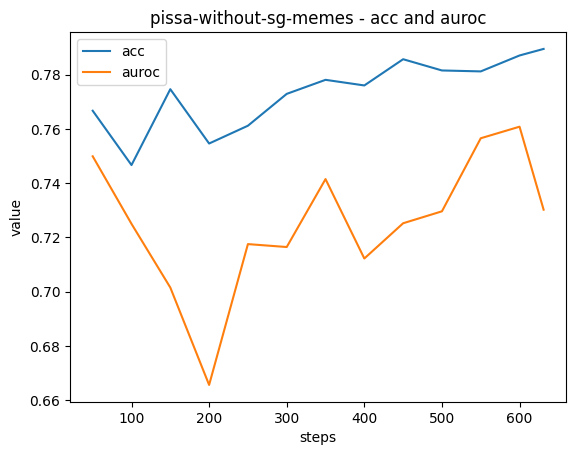

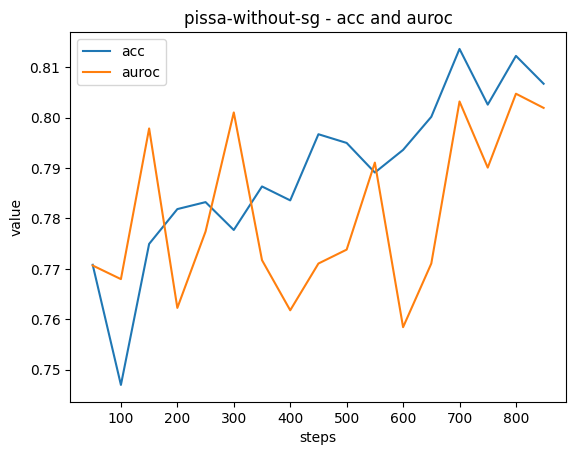

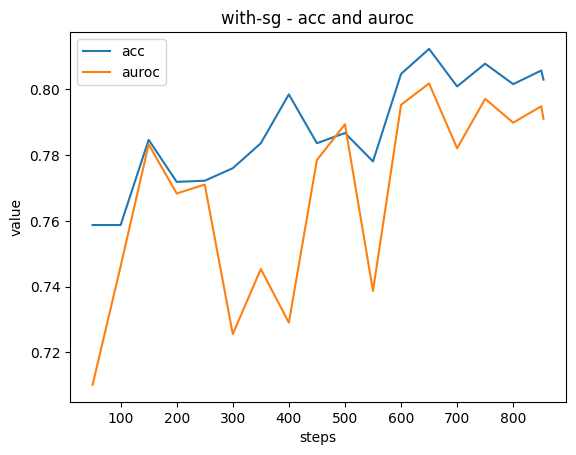

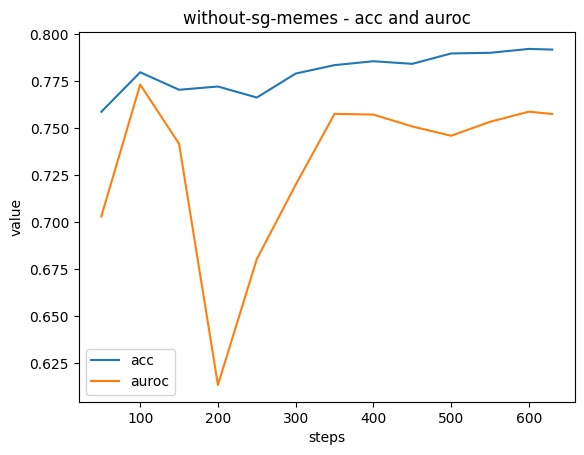

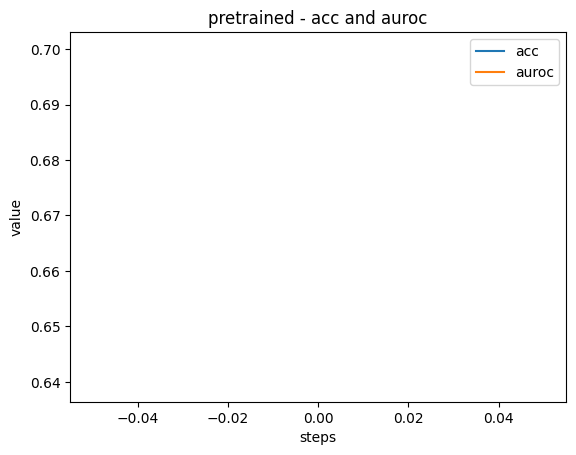

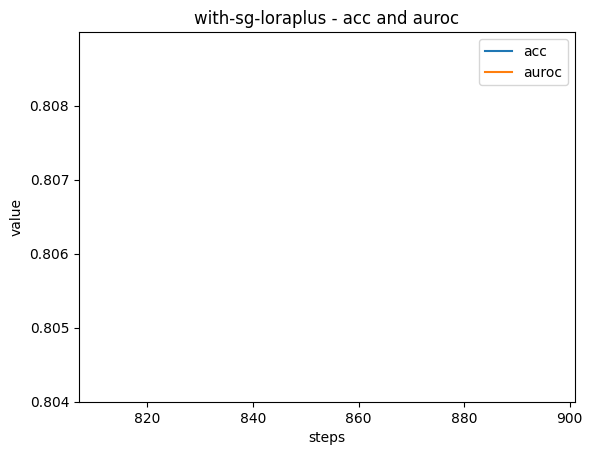

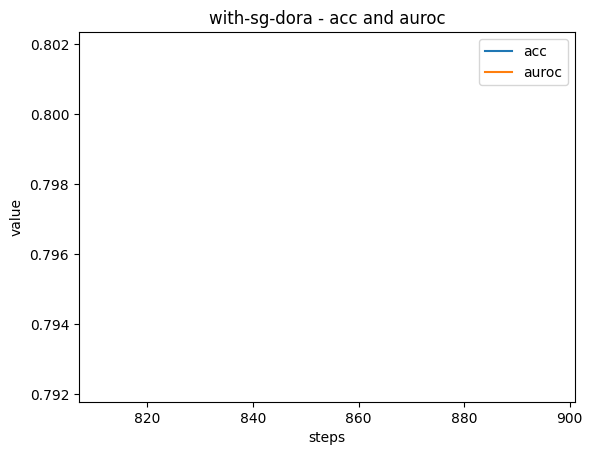

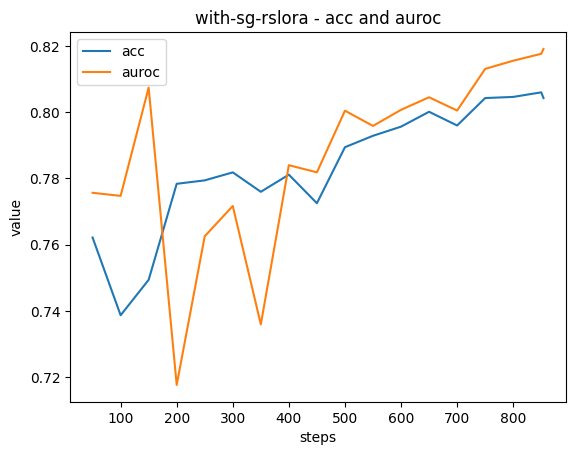

In [23]:
for run_name, metrics in runs.items():
    steps_acc, values_acc = zip(*metrics['acc'])
    steps_auroc, values_auroc = zip(*metrics['auroc'])
    plt.plot(steps_acc, values_acc, label='acc')
    plt.plot(steps_auroc, values_auroc, label='auroc')
    plt.xlabel('steps')
    plt.ylabel('value')
    plt.title(f'{run_name} - acc and auroc')
    plt.legend()
    plt.show()

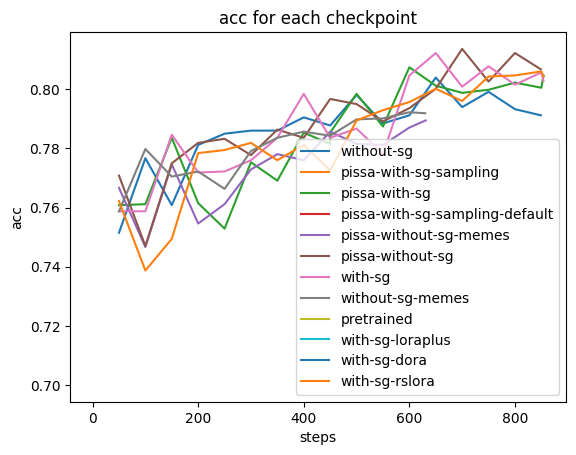

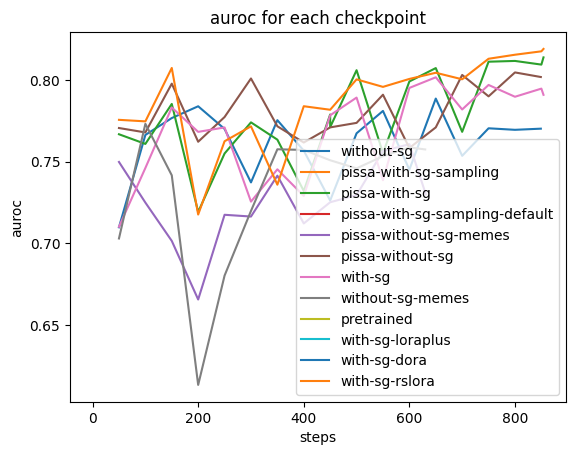

In [24]:
# Plot for acc with each checkpoint as a line
plt.figure()
for run_name, metrics in runs.items():
    steps_acc, values_acc = zip(*metrics['acc'])
    plt.plot(steps_acc, values_acc, label=run_name)
plt.xlabel('steps')
plt.ylabel('acc')
plt.title('acc for each checkpoint')
plt.legend()
plt.show()

# Plot for auroc with each checkpoint as a line
plt.figure()
for run_name, metrics in runs.items():
    steps_auroc, values_auroc = zip(*metrics['auroc'])
    plt.plot(steps_auroc, values_auroc, label=run_name)
plt.xlabel('steps')
plt.ylabel('auroc')
plt.title('auroc for each checkpoint')
plt.legend()
plt.show()